In [1]:
import kagglehub
path = kagglehub.dataset_download("veerukhannan/diabetes")
print("Path to dataset files:", path)

c:\Users\Patryk\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing

In [3]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-01
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-02
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-03
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-04
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-05
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-06
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-07
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-08
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-09
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-10
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-11
C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1\data-12
C:\U

In [4]:
print(f"File exists: {os.path.exists(path)}")
print(f"Readable: {os.access(path, os.R_OK)}")
print(f"Writable: {os.access(path, os.W_OK)}")
print(f"File path: {path}") 

File exists: True
Readable: True
Writable: True
File path: C:\Users\Patryk\.cache\kagglehub\datasets\veerukhannan\diabetes\versions\1


In [6]:
data_dir = path  # Ensure 'path' is a directory
files = sorted([f for f in os.listdir(data_dir) if f.startswith('data-')])  # Sort to maintain order
dfs = []
for file in files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path, sep='\t', header=None, names=['Date', 'Time', 'Code', 'Value'])
    dfs.append(df)

df_invalid_dates = df[~df['Date'].str.match(r'^\d{2}-\d{2}-\d{4}$', na=False)]
print("Rows with invalid date formats:")
print(df_invalid_dates)

Rows with invalid date formats:
Empty DataFrame
Columns: [Date, Time, Code, Value]
Index: []


In [7]:
df = pd.concat(dfs, ignore_index=True)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m-%d-%Y %H:%M', errors='coerce')
df['Code'] = df['Code'].astype('category')
print("Loaded DataFrame:")
print(df.head())

Loaded DataFrame:
         Date   Time Code Value            Datetime
0  04-21-1991   9:09   58   100 1991-04-21 09:09:00
1  04-21-1991   9:09   33     9 1991-04-21 09:09:00
2  04-21-1991   9:09   34    13 1991-04-21 09:09:00
3  04-21-1991  17:08   62   119 1991-04-21 17:08:00
4  04-21-1991  17:08   33     7 1991-04-21 17:08:00


In [8]:
files = [f for f in os.listdir(path) if f.startswith('data-')]  # List files starting with 'data-'
dfs = []

for file in files:
    file_path = os.path.join(path, file)  # Full file path
    df = pd.read_csv(file_path, sep='\t', header=None, names=['Date', 'Time', 'Code', 'Value'])
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m-%d-%Y %H:%M', errors='coerce')
df['Code'] = df['Code'].astype('category')
print(df.head())


         Date   Time Code Value            Datetime
0  04-21-1991   9:09   58   100 1991-04-21 09:09:00
1  04-21-1991   9:09   33     9 1991-04-21 09:09:00
2  04-21-1991   9:09   34    13 1991-04-21 09:09:00
3  04-21-1991  17:08   62   119 1991-04-21 17:08:00
4  04-21-1991  17:08   33     7 1991-04-21 17:08:00


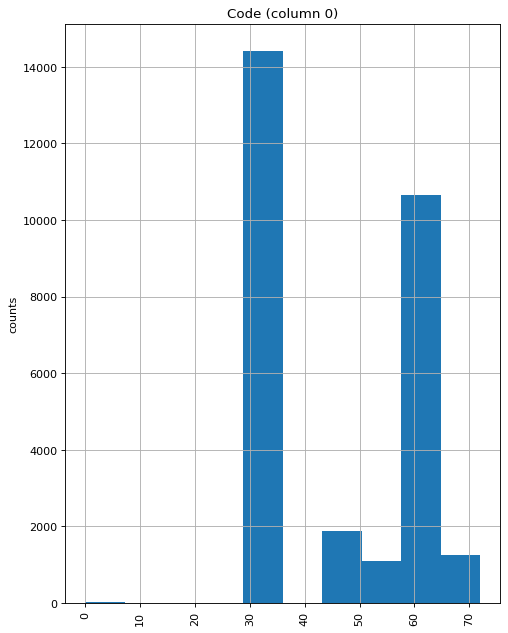

In [9]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

plotPerColumnDistribution(df, nGraphShown=3, nGraphPerRow=2);

In [10]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    
    plotCorrelationMatrix(df, 4)

In [11]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()